# Lab 1: Georeferencing TLS data using tie points
Haven Lee, 2308018

In [1]:
import numpy as np
import pandas as pd
import sympy as sp

from sympy import cos, sin, Symbol, pprint

In [2]:
# importing the laser scan data
data = np.load('scan.npy')
data[:,:5]

data = pd.DataFrame(data, columns=['range','alpha', 'phi', 'intensity'])
data['alpha'] = np.deg2rad(data['alpha'])
data['phi'] = np.deg2rad(data['phi'])
data.head()

,range,alpha,phi,intensity
0,52.344611,1.510931,-1.317206,-5.01
1,52.287125,1.511191,-1.317207,-5.33
2,52.127484,1.511959,-1.317204,-5.58
3,52.233103,1.511431,-1.317205,-5.32
4,52.181462,1.511651,-1.317205,-5.24


In [3]:
# importing the tie points data
target = pd.read_excel('tiepoints.xlsx')
target

,Tie point,Range [m],alpha [deg],Phi [deg],UTM X [m],UTM Y [m],UTM Z [m]
0,1,4.711,96.024041,209.494500,269958.38,3289284.92,-13.83
1,2,32.787,95.302806,13.044494,269994.92,3289291.58,-17.02
2,3,36.619,90.571994,292.073653,269973.56,3289251.91,-13.83
3,4,47.456,89.747596,338.008476,270005.04,3289265.51,-13.83
4,5,68.986,89.333712,27.885113,270026.11,3289313.99,-13.70
5,6*,80.409,90.014308,2.606014,270043.03,3289283.87,-14.85


### Ridge Body Transformation
- Step 1: Converting tie points from SOCS curvilinear coordinates to cartesian body frame

$$
X_b = r \cos(\theta) \cos(\phi)
$$

$$
Y_b = r \cos(\theta) \sin(\phi)
$$

$$
Z_b = r \sin(\theta)
$$

In [4]:
# converting alpha to theta
target['theta [deg]'] = 90 - target['alpha [deg]']

# converting theta and phi to radian
target['theta [rad]'] = np.deg2rad(target['theta [deg]'])
target['phi [rad]'] = np.deg2rad(target['Phi [deg]'])

target


,Tie point,Range [m],alpha [deg],Phi [deg],UTM X [m],UTM Y [m],UTM Z [m],theta [deg],theta [rad],phi [rad]
0,1,4.711,96.024041,209.494500,269958.38,3289284.92,-13.83,-6.024041,-0.105139,3.656369
1,2,32.787,95.302806,13.044494,269994.92,3289291.58,-17.02,-5.302806,-0.092551,0.227669
2,3,36.619,90.571994,292.073653,269973.56,3289251.91,-13.83,-0.571994,-0.009983,5.097647
3,4,47.456,89.747596,338.008476,270005.04,3289265.51,-13.83,0.252404,0.004405,5.899361
4,5,68.986,89.333712,27.885113,270026.11,3289313.99,-13.70,0.666288,0.011629,0.486687
5,6*,80.409,90.014308,2.606014,270043.03,3289283.87,-14.85,-0.014308,-0.000250,0.045484


In [7]:
# converting tie points from SOCS curvilinear coordinate system(Range, Theta, Phi) to SOCS cartesian coordinate system(X_b, Y_b, Z_b)
target['X_b'] = target['Range [m]'] * np.cos(target['theta [rad]']) * np.cos(target['phi [rad]'])
target['Y_b'] = target['Range [m]'] * np.cos(target['theta [rad]']) * np.sin(target['phi [rad]'])
target['Z_b'] = target['Range [m]'] * np.sin(target['theta [rad]'])
target

,Tie point,Range [m],alpha [deg],Phi [deg],UTM X [m],UTM Y [m],UTM Z [m],theta [deg],theta [rad],phi [rad],X_b,Y_b,Z_b
0,1,4.711,96.024041,209.494500,269958.38,3289284.92,-13.83,-6.024041,-0.105139,3.656369,-4.077825,-2.306606,-0.494399
1,2,32.787,95.302806,13.044494,269994.92,3289291.58,-17.02,-5.302806,-0.092551,0.227669,31.804232,7.368605,-3.030153
2,3,36.619,90.571994,292.073653,269973.56,3289251.91,-13.83,-0.571994,-0.009983,5.097647,13.760667,-33.933193,-0.365568
3,4,47.456,89.747596,338.008476,270005.04,3289265.51,-13.83,0.252404,0.004405,5.899361,44.002639,-17.770649,0.209056
4,5,68.986,89.333712,27.885113,270026.11,3289313.99,-13.70,0.666288,0.011629,0.486687,60.971718,32.262582,0.802215
5,6*,80.409,90.014308,2.606014,270043.03,3289283.87,-14.85,-0.014308,-0.000250,0.045484,80.325839,3.656024,-0.020080


In [9]:
# UTM_Z correction for the tie points due to the difference between GPS sensor and the center of target
correction = np.array([0.106]*5 + [0.056])
target['UTM Z [m] corrected'] = target['UTM Z [m]'] - correction
target

,Tie point,Range [m],alpha [deg],Phi [deg],UTM X [m],UTM Y [m],UTM Z [m],theta [deg],theta [rad],phi [rad],X_b,Y_b,Z_b,UTM Z [m] corrected
0,1,4.711,96.024041,209.494500,269958.38,3289284.92,-13.83,-6.024041,-0.105139,3.656369,-4.077825,-2.306606,-0.494399,-13.936
1,2,32.787,95.302806,13.044494,269994.92,3289291.58,-17.02,-5.302806,-0.092551,0.227669,31.804232,7.368605,-3.030153,-17.126
2,3,36.619,90.571994,292.073653,269973.56,3289251.91,-13.83,-0.571994,-0.009983,5.097647,13.760667,-33.933193,-0.365568,-13.936
3,4,47.456,89.747596,338.008476,270005.04,3289265.51,-13.83,0.252404,0.004405,5.899361,44.002639,-17.770649,0.209056,-13.936
4,5,68.986,89.333712,27.885113,270026.11,3289313.99,-13.70,0.666288,0.011629,0.486687,60.971718,32.262582,0.802215,-13.806
5,6*,80.409,90.014308,2.606014,270043.03,3289283.87,-14.85,-0.014308,-0.000250,0.045484,80.325839,3.656024,-0.020080,-14.906


- Step 2: Using body frame coordinates and UTM_X, UTM_Y, UTM_Z coordinates of tie points, estimate parameters Tx, Ty, Tz, Epsilon_1, Epsilon_2, Epsilon_3 of rigid body transformation

$$
 \mathbf{r}^{Global} = \begin{bmatrix} X_{UTM} \\ Y_{UTM} \\ Z_{UTM} \end{bmatrix} = \begin{bmatrix} T_X \\ T_Y \\ T_Z \end{bmatrix}_{Translation} + R_1(\epsilon_1)R_2(\epsilon_2)R_3(\epsilon_3) \begin{bmatrix} X \\ Y \\ Z \end{bmatrix}_{b} 
  $$


In [14]:
# Rotation matrix from SOCS to UTM
e1 = Symbol('epsilon_1')
e2 = Symbol('epsilon_2')
e3 = Symbol('epsilon_3')

r1 = sp.Matrix([[1, 0, 0], [0, cos(e1), sin(e1)], [0, -sin(e1), cos(e1)]])
r2 = sp.Matrix([[cos(e2), 0, -sin(e2)], [0, 1, 0], [sin(e2), 0, cos(e2)]])
r3 = sp.Matrix([[cos(e3), sin(e3), 0], [-sin(e3), cos(e3), 0], [0, 0, 1]])

rot = r1*r2*r3
rot_f = sp.lambdify([e1, e2, e3], rot,'numpy')
rot


Matrix([
[                                               cos(epsilon_2)*cos(epsilon_3),                                                 sin(epsilon_3)*cos(epsilon_2),               -sin(epsilon_2)],
[sin(epsilon_1)*sin(epsilon_2)*cos(epsilon_3) - sin(epsilon_3)*cos(epsilon_1),  sin(epsilon_1)*sin(epsilon_2)*sin(epsilon_3) + cos(epsilon_1)*cos(epsilon_3), sin(epsilon_1)*cos(epsilon_2)],
[sin(epsilon_1)*sin(epsilon_3) + sin(epsilon_2)*cos(epsilon_1)*cos(epsilon_3), -sin(epsilon_1)*cos(epsilon_3) + sin(epsilon_2)*sin(epsilon_3)*cos(epsilon_1), cos(epsilon_1)*cos(epsilon_2)]])

In [15]:
# Transformation Matrix from SOCS to UTM
Tx = Symbol('T_x')
Ty = Symbol('T_y')
Tz = Symbol('T_z')
Xb = Symbol('X_b')
Yb = Symbol('Y_b')
Zb = Symbol('Z_b')

trans = sp.Matrix([Tx, Ty, Tz]) + rot * sp.Matrix([Xb, Yb, Zb])
trans_f = sp.lambdify((Tx, Ty, Tz, e1, e2, e3, Xb, Yb, Zb), trans, 'numpy')
trans

Matrix([
[                                                                                                                  T_x + X_b*cos(epsilon_2)*cos(epsilon_3) + Y_b*sin(epsilon_3)*cos(epsilon_2) - Z_b*sin(epsilon_2)],
[ T_y + X_b*(sin(epsilon_1)*sin(epsilon_2)*cos(epsilon_3) - sin(epsilon_3)*cos(epsilon_1)) + Y_b*(sin(epsilon_1)*sin(epsilon_2)*sin(epsilon_3) + cos(epsilon_1)*cos(epsilon_3)) + Z_b*sin(epsilon_1)*cos(epsilon_2)],
[T_z + X_b*(sin(epsilon_1)*sin(epsilon_3) + sin(epsilon_2)*cos(epsilon_1)*cos(epsilon_3)) + Y_b*(-sin(epsilon_1)*cos(epsilon_3) + sin(epsilon_2)*sin(epsilon_3)*cos(epsilon_1)) + Z_b*cos(epsilon_1)*cos(epsilon_2)]])

In [16]:
# Define initial values U0 using the average of the UTM coordinates of the tie points and zero rotation
X_UTM_avg = target['UTM X [m]'].mean()
Y_UTM_avg = target['UTM Y [m]'].mean()
Z_UTM_avg = target['UTM Z [m] corrected'].mean()

U0 = np.array([X_UTM_avg, Y_UTM_avg, Z_UTM_avg, 0, 0, 0])
U0

array([ 2.70000173e+05,  3.28928196e+06, -1.46076667e+01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

In [19]:
# Jacobian Matrix of the transformation from SOCS to UTM
jacob = trans.jacobian([Tx, Ty, Tz, e1, e2, e3])
jacob_f = sp.lambdify([Tx, Ty, Tz, e1, e2, e3, Xb, Yb, Zb], jacob, 'numpy')

jacob


Matrix([
[1, 0, 0,                                                                                                                                                                                                             0,                                             -X_b*sin(epsilon_2)*cos(epsilon_3) - Y_b*sin(epsilon_2)*sin(epsilon_3) - Z_b*cos(epsilon_2),                                                                                                   -X_b*sin(epsilon_3)*cos(epsilon_2) + Y_b*cos(epsilon_2)*cos(epsilon_3)],
[0, 1, 0,  X_b*(sin(epsilon_1)*sin(epsilon_3) + sin(epsilon_2)*cos(epsilon_1)*cos(epsilon_3)) + Y_b*(-sin(epsilon_1)*cos(epsilon_3) + sin(epsilon_2)*sin(epsilon_3)*cos(epsilon_1)) + Z_b*cos(epsilon_1)*cos(epsilon_2), X_b*sin(epsilon_1)*cos(epsilon_2)*cos(epsilon_3) + Y_b*sin(epsilon_1)*sin(epsilon_3)*cos(epsilon_2) - Z_b*sin(epsilon_1)*sin(epsilon_2), X_b*(-sin(epsilon_1)*sin(epsilon_2)*sin(epsilon_3) - cos(epsilon_1)*cos(epsilon_3)) + Y_b*(sin(epsilon_1)*sin(ep

In [20]:
# Define residual vector
X_UTM = Symbol('X_UTM')
Y_UTM = Symbol('Y_UTM')
Z_UTM = Symbol('Z_UTM')
X_calc = Symbol('X_calc')
Y_calc = Symbol('Y_calc')
Z_calc = Symbol('Z_calc')

Residual = sp.Matrix([X_UTM, Y_UTM, Z_UTM]) - sp.Matrix([X_calc, Y_calc, Z_calc])

Residual

Matrix([
[X_UTM - X_calc],
[Y_UTM - Y_calc],
[Z_UTM - Z_calc]])

In [24]:
# Updating parameter for 10 iterations

# to track the changes in the parameters, we will store the values of the parameters in the following lists
Tx_plot = [U0[0]]    
Ty_plot = [U0[1]]
Tz_plot = [U0[2]]
e1_plot = [U0[3]]
e2_plot = [U0[4]]
e3_plot = [U0[5]]

for epoch in range(10):
    # to calculate the jacobian matrix and the residual vector for all 6 tie points, we need to calculate the jacobian matrix and the residual vector for first tie point and then stack others on it
    A = jacob_f(U0[0], U0[1], U0[2], U0[3], U0[4], U0[5], target['X_b'][0], target['Y_b'][0], target['Z_b'][0])
    calc = trans_f(U0[0], U0[1], U0[2], U0[3], U0[4], U0[5], target['X_b'][0], target['Y_b'][0], target['Z_b'][0])
    residuals = np.array([target['UTM X [m]'][0] - calc[0] , target['UTM Y [m]'][0] - calc[1], target['UTM Z [m] corrected'][0] - calc[2]]).reshape(3,1)

    # for the rest of the tie points, we will calculate the jacobian matrix and the residual vector and stack them on the initial ones
    for i in range(1, len(target['Tie point'])):
        
        Xb = target['X_b'][i]
        Yb = target['Y_b'][i]
        Zb = target['Z_b'][i]
        X_UTM = target['UTM X [m]'][i]
        Y_UTM = target['UTM Y [m]'][i]
        Z_UTM = target['UTM Z [m] corrected'][i]
        
        jacob_i = jacob_f(U0[0], U0[1], U0[2], U0[3], U0[4], U0[5], Xb, Yb, Zb)
        A = np.vstack((A, jacob_i))

        calc_i = trans_f(U0[0], U0[1], U0[2], U0[3], U0[4], U0[5], Xb, Yb, Zb)
        
        residual_i = (np.array([X_UTM, Y_UTM, Z_UTM]) - calc_i.T).reshape(3,1)
        residuals = np.vstack((residuals, residual_i))
    
    # update the parameters, Tx, Ty, Tz, e1, e2, e3
    update =  np.linalg.inv(A.T @ A) @ (A.T @ residuals)
    U0 = U0 + update.flatten()

    # store the updated parameters at each iteration
    print(f'U at epoch {epoch+1} is {U0} \n')
    Tx_plot.append(U0[0])
    Ty_plot.append(U0[1])
    Tz_plot.append(U0[2])
    e1_plot.append(U0[3])
    e2_plot.append(U0[4])
    e3_plot.append(U0[5])



U at epoch 1 is [ 2.69962667e+05  3.28928688e+06 -1.35043897e+01  2.74723249e-03
 -1.68899808e-02  8.28824550e-02] 

U at epoch 2 is [ 2.69962667e+05  3.28928688e+06 -1.35043897e+01  2.74723249e-03
 -1.68899808e-02  8.28824550e-02] 

U at epoch 3 is [ 2.69962667e+05  3.28928688e+06 -1.35043897e+01  2.74723249e-03
 -1.68899808e-02  8.28824550e-02] 

U at epoch 4 is [ 2.69962667e+05  3.28928688e+06 -1.35043897e+01  2.74723249e-03
 -1.68899808e-02  8.28824550e-02] 

U at epoch 5 is [ 2.69962667e+05  3.28928688e+06 -1.35043897e+01  2.74723249e-03
 -1.68899808e-02  8.28824550e-02] 

U at epoch 6 is [ 2.69962667e+05  3.28928688e+06 -1.35043897e+01  2.74723249e-03
 -1.68899808e-02  8.28824550e-02] 

U at epoch 7 is [ 2.69962667e+05  3.28928688e+06 -1.35043897e+01  2.74723249e-03
 -1.68899808e-02  8.28824550e-02] 

U at epoch 8 is [ 2.69962667e+05  3.28928688e+06 -1.35043897e+01  2.74723249e-03
 -1.68899808e-02  8.28824550e-02] 

U at epoch 9 is [ 2.69962667e+05  3.28928688e+06 -1.35043897e+01

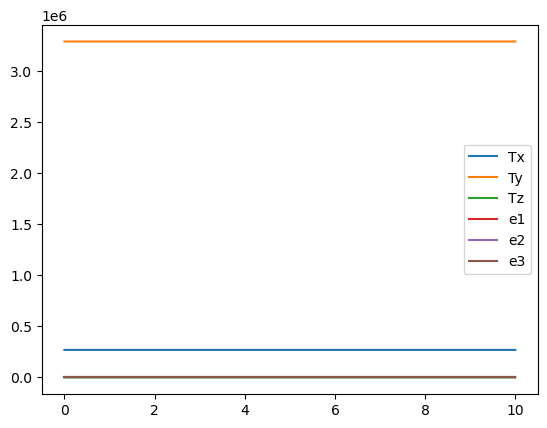

,Tx,Ty,Tz,e1,e2,e3
0,270000.173333,3.289282e+06,-14.607667,0.000000,0.000000,0.000000
1,269962.531489,3.289287e+06,-13.506098,0.004155,-0.016558,0.082830
2,269962.666675,3.289287e+06,-13.504375,0.002747,-0.016890,0.082882
3,269962.666677,3.289287e+06,-13.504390,0.002747,-0.016890,0.082882
4,269962.666677,3.289287e+06,-13.504390,0.002747,-0.016890,0.082882
5,269962.666677,3.289287e+06,-13.504390,0.002747,-0.016890,0.082882
6,269962.666677,3.289287e+06,-13.504390,0.002747,-0.016890,0.082882
7,269962.666677,3.289287e+06,-13.504390,0.002747,-0.016890,0.082882
8,269962.666677,3.289287e+06,-13.504390,0.002747,-0.016890,0.082882
9,269962.666677,3.289287e+06,-13.504390,0.002747,-0.016890,0.082882


In [13]:
plot_data = pd.DataFrame({'Tx': Tx_plot, 'Ty': Ty_plot, 'Tz': Tz_plot, 'e1': e1_plot, 'e2': e2_plot, 'e3': e3_plot})

import matplotlib.pyplot as plt

plt.plot(plot_data['Tx'], label='Tx')
plt.plot(plot_data['Ty'], label='Ty')
plt.plot(plot_data['Tz'], label='Tz')
plt.plot(plot_data['e1'], label='e1')
plt.plot(plot_data['e2'], label='e2')
plt.plot(plot_data['e3'], label='e3')
plt.legend()

plt.show()
plot_data

### Step 3: Apply Transformation to Cloud Points 

In [26]:
# converting the laser scan data from SOCS curvilinear coordinate system(Range, Alpha, Phi) to SOCS cartesian coordinate system(X, Y, Z)

# converting alpha to theta, and updating theta to radian
data['theta'] = np.pi/2 - data['alpha']

# updating curvilinear to cartesian
data['X'] = data['range'] * np.cos(data['theta']) * np.cos(data['phi'])
data['Y'] = data['range'] * np.cos(data['theta']) * np.sin(data['phi'])
data['Z'] = data['range'] * np.sin(data['theta'])

data.head()

,range,alpha,phi,intensity,theta,X,Y,Z
0,52.344611,1.510931,-1.317206,-5.01,0.059865,13.10875,-50.579750,3.13175
1,52.287125,1.511191,-1.317207,-5.33,0.059605,13.09450,-50.525002,3.11475
2,52.127484,1.511959,-1.317204,-5.58,0.058837,13.05525,-50.373001,3.06525
3,52.233103,1.511431,-1.317205,-5.32,0.059365,13.08125,-50.473499,3.09900
4,52.181462,1.511651,-1.317205,-5.24,0.059146,13.06850,-50.424252,3.08450


In [38]:
# Georeferencing the laser scan data from SOCS to UTM

# Create a new numpy array to store the UTM coordinates of the laser scan data
xyz = data[['X', 'Y', 'Z']].values
xyz_georef = xyz.copy()

rotation = rot_f(U0[3], U0[4], U0[5])

# apply the rotation and translation to the laser scan data
for i in range(xyz.shape[0]):
    xyz_georef[i] = U0[0:3] + rotation @ xyz[i]

# save the georeferenced points as text and as a numpy array
np.savetxt('georef_points.txt', xyz_georef)
np.save('georef_points.npy', xyz_georef)

# preview of the georeferenced points
transformed_points = pd.read_csv('georef_points.txt', delimiter=' ', header=None, names=['X', 'Y', 'Z'])
print(transformed_points.head())


               X             Y          Z
0  269971.594678  3.289235e+06 -10.381554
1  269971.584724  3.289235e+06 -10.398541
2  269971.557360  3.289236e+06 -10.448011
3  269971.575519  3.289236e+06 -10.414282
4  269971.566646  3.289236e+06 -10.428772
